In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder


In [3]:
X_cat = pd.read_csv('../data/final_categorical_features.csv')
X_num = pd.read_csv('../data/final_numerical_features.csv')
y = pd.read_csv('../data/final_targets.csv')

## correlation for numerical features 

<Axes: >

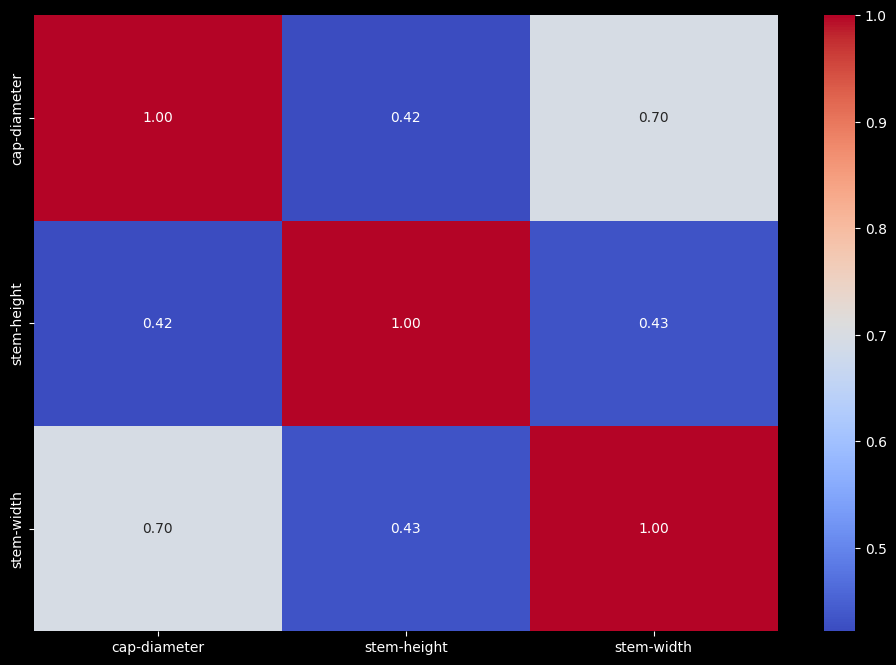

In [4]:
corr = X_num.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

there is a strong correlation between cap-diameter and stem-width  
so we can drop one of them


okay but which one to drop let's see which one has a statistically significant correlation with the target variable 

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_slected_numerical= SelectKBest(f_classif, k=2).fit_transform(X_num, y_encoded)
X_slected_numerical.shape

g:\projects\mashrom_project\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(60903, 2)

okay now we are done with numerical features let's move to categorical features

In [11]:
X_cat.head()

,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season
0,x,o,f,e,w,w,t,g,d,w
1,x,o,f,e,w,w,t,g,d,u
2,x,o,f,e,w,w,t,g,d,w
3,f,e,f,e,w,w,t,p,d,w
4,x,o,f,e,w,w,t,p,d,w
